In [138]:
import osmnx as ox
import pandas as pd
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

In [139]:
price_today= pd.read_excel('price_today.xlsx')


In [140]:
geolocator = Nominatim(user_agent="My-App")
location = geolocator.geocode("Plaza Maestro Tarrega, 8, Alcobendas") 

print((location.latitude, location.longitude))

(40.5492094, -3.6446537)


In [141]:
type(location)

geopy.location.Location

In [184]:
price_today = price_today.sort_values('Distance')
price_head=price_today.head(3)
price_head

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción,Latitud_partida,Longitud_partida,mercator_start,mercator_finish,Distance
6386,MADRID,Alcobendas,ALCOBENDAS,28100,"AVENIDA MARQUES DE LA VALDAVIA, 132",-3.651861,40.546556,"1,779",No disponible,No disponible,"1,799",No disponible,PETROPRIX,L-D: 24H,23-04-2022,40.549209,-3.644654,POINT (4513917.342477823 -405994.8883876073),POINT (4513621.967340952 -406798.8305516534),856.486704
6383,MADRID,Alcobendas,ALCOBENDAS,28100,"CALLE MARQUES DE LA VALDAVIA (DEL), 138",-3.653944,40.546944,"1,879",No disponible,"2,021","1,929","2,019",BP VALDAVIA,L-D: 24H,23-04-2022,40.549209,-3.644654,POINT (4513917.342477823 -405994.8883876073),POINT (4513665.159303379 -407031.1811113249),1066.535964
6394,MADRID,Alcobendas,ALCOBENDAS,28100,"CL AVENIDA DE ESPAÑA, S.N.",-3.634639,40.546167,"1,869",No disponible,"2,019","1,929","2,019",REPSOL,L-D: 24H,23-04-2022,40.549209,-3.644654,POINT (4513917.342477823 -405994.8883876073),POINT (4513578.664059033 -404877.8039682711),1167.296308


In [88]:
#madrid_street = ox.graph_from_place('Madrid, España', network_type = 'drive') 

#blr_street_projected = ox.project_graph(madrid_street)
 
#ox.plot_graph(blr_street_projected)

In [89]:
# tipos de tiles:

# - CartoDB dark_matter
# - Stamen Toner

In [90]:
#probar las páginas web.
# con folium voy creando mapas
# con OSMox 

In [91]:
#folium_map = folium.Map(location=[40.4167047, -3.7035825],  width=1000, height=1000,
                        #zoom_start=10,
                        #tiles='cartodbpositron')

#folium_map


In [92]:
#MarkerCluster(data=list(zip(price_head['Latitud'].values, price_head['Longitud'].values))).add_to(folium_map)
#folium.LayerControl().add_to(folium_map)
#folium_map



In [251]:

m = folium.Map(location=[40.546376,-3.658541], zoom_start=15)


marker_cluster = MarkerCluster().add_to(m)

folium.Marker(
    location=[price_head.iloc[0]['Latitud'],price_head.iloc[0]['Longitud']],
    popup="Add popup text here.",
    icon=folium.Icon(color="green", icon="ok-sign"),
).add_to(marker_cluster)

folium.Marker(
    location=[price_head.iloc[1]['Latitud'],price_head.iloc[1]['Longitud']],
    popup="Add popup text here.",
    icon=folium.Icon(color="green",  icon="ok-sign"),
).add_to(marker_cluster)

folium.Marker(
    location=[price_head.iloc[2]['Latitud'],price_head.iloc[2]['Longitud']],
    popup="Add popup text here.",
    icon=folium.Icon(color="green",  icon="ok-sign"),
).add_to(marker_cluster)

folium.Marker(
    location=[price_head.iloc[0]['Latitud_partida'],price_head.iloc[2]['Longitud_partida']],
    popup="Add popup text here.",
    icon=folium.Icon(color="lightgray",  icon="home"),
).add_to(marker_cluster)

m

In [181]:
html=f"""
    <h> {price_head['Rótulo']}</h>
    <p><b>Prices:</b></p>
        <li> Gasolina 95:{price_head['Precio gasolina 95 E5']}€</li>
        <li> Diésel:{price_head['Precio gasóleo A']}€</li>
    </ul> 
    </p>
    <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p>
    """
iframe = folium.IFrame(html=html, width=200, height=200)
popup = folium.Popup(iframe, max_width=2650)
popup

In [245]:
#FUNCION BUENA
mapa_loop = folium.Map(location=[40.546376,-3.638541], zoom_start=15)

marker_cluster = MarkerCluster().add_to(mapa_loop)

def ubi_gasolinera(price_head):
    for i in range(0,len(price_head)):
        html=f"""
            <h> {price_head.iloc[i]['Rótulo']}</h>
            <p><b>Prices:</b></p>
                <li> Gasolina 95:{price_head.iloc[i]['Precio gasolina 95 E5']}€</li>
                <li> Diésel:{price_head.iloc[i]['Precio gasóleo A']}€</li>
            </ul> 
            </p>
            <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p>
            """
        iframe = folium.IFrame(html=html, width=200, height=200)
        popup = folium.Popup(iframe, max_width=2650)
        
        folium.Marker(
                location=[price_head.iloc[i]['Latitud'],price_head.iloc[i]['Longitud']],
                popup=popup,
                icon=folium.Icon(color="green",  icon="ok-sign"),
        ).add_to(marker_cluster)
    return mapa_loop

def ubi_actual(price_head):
    html=f"""
        <h><b> Actualmente te encuentras aquí </b></h>
        """
    iframe = folium.IFrame(html=html, width=150, height=60)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[price_head.iloc[0]['Latitud_partida'],price_head.iloc[0]['Longitud_partida']],
        popup=popup,
        icon=folium.Icon(color="lightgray",  icon="home"),
).add_to(marker_cluster)  
    return mapa_loop
    
ubi_gasolinera(price_head)
ubi_actual(price_head)


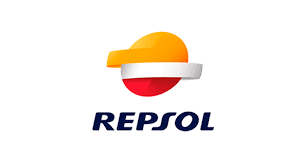

In [255]:
m = folium.Map(location=[40.546376,-3.658541], zoom_start=15)


marker_cluster = MarkerCluster().add_to(m)

html=f"""
    <h> {price_head.iloc[1]['Rótulo']}</h>
    <p><b>Prices:</b></p>
        <li> Gasolina 95:{price_head.iloc[1]['Precio gasolina 95 E5']}€</li>
        <li> Diésel:{price_head.iloc[1]['Precio gasóleo A']}€</li>
    </ul> 
    </p>
    <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p>
    """

iframe = folium.IFrame(html=html, width=200, height=200)
popup = folium.Popup(iframe, max_width=2650)


folium.Marker(
    location=[price_head.iloc[1]['Latitud'],price_head.iloc[1]['Longitud']],
    popup= popup,
    #icon=folium.Icon(color="cadetblue",icon="fa-car", prefix="fa"),
    icon = folium.features.CustomIcon('REPSOL.png', icon_size=(70, 50)),
).add_to(marker_cluster)

# hacer un diccionario con la columnas de marca y el value sea la foto. hacer icon= columna[i] y luego que me de el value
# tags: <b> es negrita, <p> es pequeña, <h> es grande y se ponen números para aumentarlo


m

NameError: name 'df_acum' is not defined